<h2>Outline</h2>
<ul>
    <li>Introduction</li>
    <li>Principal Component Analysis:
        <ul><li>Concept</li>
            <li>Implementation</li>
            <li>Pros and Cons</li>
        </ul>
    </li>    
    <li>Other methods</li>
</ul>

<h2>1. Introduction</h2>

In [272]:
import pandas as pd

df = pd.read_csv('datasets/crime_data_curated.csv')
df.head()

,Unnamed: 0,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,num_violent_crimes
0,54,Toledocity,OH,95.0,77000.0,1,332943,2.54,19.70,76.96,...,5502.0,1698.29,15251.0,4707.51,4517.0,1394.26,357.0,110.19,984.96,7910.25
1,55,Philadelphiacity,PA,101.0,60000.0,1,1585577,2.63,39.86,53.52,...,15117.0,988.14,39181.0,2561.10,23785.0,1554.73,2282.0,149.17,1279.60,5253.14
2,58,Lynchburgcity,VA,680.0,47672.0,1,66049,2.63,26.41,72.45,...,560.0,833.83,2316.0,3448.48,184.0,273.97,50.0,74.45,753.42,4630.73
3,99,NewHaventown,CT,9.0,52070.0,1,130474,2.66,36.14,53.85,...,3417.0,2856.93,7719.0,6453.80,1873.0,1566.00,134.0,112.04,2127.02,10988.76
4,122,Springfieldcity,OH,23.0,74118.0,1,70487,2.59,17.38,81.61,...,963.0,1362.13,4048.0,5725.76,457.0,646.41,6.0,8.49,1497.92,7742.79


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Columns: 148 entries, Unnamed: 0 to num_violent_crimes
dtypes: float64(116), int64(30), object(2)
memory usage: 128.5+ KB


In [274]:
X = df.iloc[:,6:145]
y = df.iloc[:,[-1]]

In [275]:
from sklearn.feature_selection import r_regression

N_f = len(X.columns)

r_coefs = r_regression(X,y)#compute the pearson correlation for each feature
r_dict = {'coefs':[]}
r_coefs_df = pd.DataFrame(r_dict)
for i in range(N_f):
    r_coefs_df.loc[X.columns[i],'coefs'] = r_coefs[i]**2
r_coefs_df = r_coefs_df.sort_values(by=['coefs'],ascending=False)
#r_coefs_df.head(20)
#X=X.drop(columns=['burglPerPop','larcPerPop'])
X=X.drop(columns=['larcPerPop'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [276]:
X.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,autoTheft,autoTheftPerPop,arsons
0,332943,2.54,19.70,76.96,1.05,3.97,14.78,28.65,14.52,12.25,...,1594.0,492.02,1195.0,368.86,5502.0,1698.29,15251.0,4517.0,1394.26,357.0
1,1585577,2.63,39.86,53.52,2.74,5.63,13.92,28.02,14.12,13.74,...,11531.0,753.74,6821.0,445.86,15117.0,988.14,39181.0,23785.0,1554.73,2282.0
2,66049,2.63,26.41,72.45,0.76,0.72,17.79,29.84,18.19,14.33,...,107.0,159.32,351.0,522.63,560.0,833.83,2316.0,184.0,273.97,50.0
3,130474,2.66,36.14,53.85,2.41,13.22,17.06,34.55,19.17,10.81,...,1238.0,1035.08,1154.0,964.85,3417.0,2856.93,7719.0,1873.0,1566.00,134.0
4,70487,2.59,17.38,81.61,0.51,0.65,16.05,28.26,15.37,13.59,...,208.0,294.21,786.0,1111.77,963.0,1362.13,4048.0,457.0,646.41,6.0


In [277]:
from sklearn.preprocessing import StandardScaler

Sc = StandardScaler()
X_sc_0 = Sc.fit_transform(X)#features are normalised
X_sc_0 = pd.DataFrame(X_sc_0, columns = X.columns)

In [278]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X_sc_0,y, test_size=0.2, random_state=1234)

In [279]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

Text(0.5, 1.0, 'R2 score- test - MLR: 0.16')

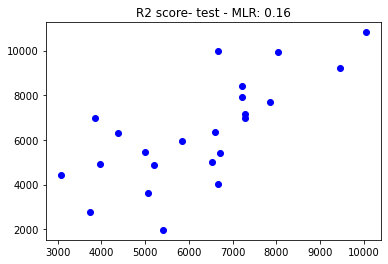

In [280]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_test = mlr.predict(X_test)
r2_score_test_mlr = metrics.r2_score(y_test,y_pred_test)

plt.figure()
plt.scatter(y_test,y_pred_test,color="blue")
plt.title('R2 score- test - MLR: %.2f'%(r2_score_test_mlr))

<h2>2. Principal Component Analysis</h2>

<h3>2.1. Concept</h3><br/>
Principal component analysis is a dimensional reduction technique that <b>project</b> the data into a lower-dimensional space
which optimally maintain data explanation or variance.

Consider a matrix X of m rows and n columns representing the dataset:<br/><br/> X = 
$\begin{pmatrix}
a_{11} & a_{12} & ... &a_{1n}\\
a_{21} & a_{22} & ... &a_{2n}\\
a_{31} & a_{32} & ... &a_{3n}\\
.&.&...&.\\
a_{m1} & a_{m2} & ... &a_{mn}\\
\end{pmatrix}$

The task of PCA is to project the matrix by linear transformation leading to <b>a matrix with fewer columns</b> that maintain maximal information content (i.e. variance). We thus need a transformation matrix <b>W</b> of n by p that can yield fewer columns.

W = $\begin{pmatrix}
w_{11} & w_{12} & ... &w_{1p}\\
w_{21} & w_{22} & ... &w_{2p}\\
w_{31} & w_{32} & ... &w_{3p}\\
.&.&...&.\\
w_{n1} & w_{n2} & ... &w_{np}\\
\end{pmatrix}$ such that

$X.W$ yields $D$, the transformed datasets:

$D = \begin{pmatrix}
a_{11} & a_{12} & ... &a_{1n}\\
a_{21} & a_{22} & ... &a_{2n}\\
a_{31} & a_{32} & ... &a_{3n}\\
.&.&...&.\\
a_{m1} & a_{m2} & ... &a_{mn}\\
\end{pmatrix}\begin{pmatrix}
w_{11} & w_{12} & ... &w_{1p}\\
w_{21} & w_{22} & ... &w_{2p}\\
w_{31} & w_{32} & ... &w_{3p}\\
.&.&...&.\\
w_{n1} & w_{n2} & ... &w_{np}\\
\end{pmatrix}=\begin{pmatrix}
d_{11} & d_{12} & ... &d_{1p}\\
d_{21} & d_{22} & ... &d_{2p}\\
d_{31} & d_{32} & ... &d_{3p}\\
.&.&...&.\\
d_{m1} & d_{m2} & ... &d_{mp}\\
\end{pmatrix}$

This mapping leatures to new features $d_1,d_2,...d_p$, called principal components that are obtained as a linear combination of original features:

$$
d_i = w_{1i}x_1+w_{2i}x_2+w_{3i}x_3+..+w_{ni}x_n
$$
How do we find $W$?

<b>Algorithm - PCA</b>

<img src="Media/alg1.png"/>

<img src="Media/pca_flow1.png"/>

<img src="Media/pca_flow2.png"/>

<b> Data Transformation</b>

Given the dataset $X_{m x n}$, Find the mean per feature $\mu_i = \frac{1}{m}\sum_{j=1}^{m}x_{ji}$

<ol>
    <li>Center the dataset: $D_{m x n} = X_{m x n} -\mu$</li>
    <li>Find the covariance matrix: $C_{n x n} = \frac{1}{n-1}D_{m x n}D_{m x n}^T$</li>
    <li>Compute Eigen vectors $V =[v_1,v_2,..v_n]$ and $\lambda_i$ values: $C_{mxn}v_i = \lambda_iv_i, i=1,2,..n$</li>
    <li>Sort eigenvectors per eigen values and select the top $p$ to form $W=[v_1,v_2,..v_p]$ </li>
    <li>Transform the data:</li>
</ol>
$$
D_{m x p} = D_{m x n}. W_{n x p}
$$

<b> Data Reconstruction</b>

$$
D_{m x n} = D_{m x n}. W_{n x p}^T
$$<br/>
$$
X_{m x n}^{\prime} = D_{m x n} + \mu
$$

<h3>2.2. Implementation in Python</h3>

In [281]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_sc_0)
X_transformed = pca.transform(X_sc_0)
X_transformed_df = pd.DataFrame(X_transformed)
X_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,4.219111,-5.451082,-0.336955,0.073796,0.818608,0.104679,-0.851338,0.742954,-1.297521,1.001868,...,0.035061,0.045334,-0.026805,-0.000175,0.003252,-0.000135,-0.008636,0.006929,-0.013287,6.727960e-16
1,19.512980,-10.053774,20.729232,9.558297,-3.615286,8.396236,-2.482414,-0.037838,1.671083,-0.576850,...,0.000084,-0.001577,-0.002747,0.001640,-0.000681,0.000066,0.000333,0.001240,-0.000496,8.518252e-16
2,0.098056,-3.701729,-2.447544,-3.987305,0.443810,0.429069,-1.456008,-1.412611,-1.117047,3.294527,...,0.009654,0.008792,0.016941,0.001012,0.030850,-0.001348,0.001170,0.000865,0.003842,4.417965e-16
3,5.609246,2.311097,0.768636,-3.844642,-0.334843,-2.752572,-2.194058,0.343032,0.953800,-0.944701,...,0.017543,-0.011708,-0.022894,0.004998,-0.004076,-0.004047,0.009964,-0.001774,-0.015436,1.674619e-15
4,2.518467,-5.264884,-5.115013,-1.265320,-0.012881,-0.749283,-0.544640,1.352323,-0.487086,0.086724,...,-0.018254,-0.000433,-0.007616,0.028825,-0.033914,-0.021787,0.002511,0.026418,-0.015144,-1.221850e-15


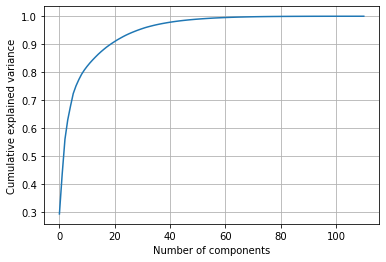

In [282]:
import numpy as np
# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid()

In [283]:
pca = PCA(n_components = 30)
#pca = PCA(0.95)
pca.fit(X_sc_0)
X_transformed = pca.transform(X_sc_0)
X_transformed_df = pd.DataFrame(X_transformed)
X_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,4.219111,-5.451082,-0.336955,0.073796,0.818608,0.104679,-0.851338,0.742954,-1.297521,1.001868,...,0.143786,0.045325,0.295457,-0.200836,-0.063500,0.617708,0.253706,0.326342,0.792898,0.106142
1,19.512980,-10.053774,20.729232,9.558297,-3.615286,8.396236,-2.482414,-0.037838,1.671083,-0.576850,...,-0.607037,0.801308,-1.202406,-0.452439,-0.485892,-0.189758,-1.736733,0.781496,0.124553,-0.859616
2,0.098056,-3.701729,-2.447544,-3.987305,0.443810,0.429069,-1.456008,-1.412611,-1.117047,3.294527,...,1.737019,-0.935616,0.863289,0.165441,0.867698,0.665956,-0.711845,-0.908223,0.684244,0.899118
3,5.609246,2.311097,0.768636,-3.844642,-0.334843,-2.752572,-2.194058,0.343032,0.953800,-0.944701,...,-0.069618,-0.460690,0.076684,-0.655510,-0.570654,0.439144,-0.878309,0.150395,-0.141830,0.430349
4,2.518467,-5.264884,-5.115013,-1.265320,-0.012881,-0.749283,-0.544640,1.352323,-0.487086,0.086724,...,0.689757,0.281522,-0.818737,-1.222529,-0.225554,-0.844896,0.154972,-0.090597,-0.598220,0.571227


In [284]:
pca.explained_variance_ratio_[:3]#Explained variance

array([0.29347376, 0.14203274, 0.12466962])

In [285]:
X_sc = Sc.fit_transform(X_transformed_df)#features are normalised
X_sc_transformed_df= pd.DataFrame(X_sc, columns = X_transformed_df.columns)
X_sc_transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.662974,-1.231258,-0.081237,0.023905,0.313973,0.041905,-0.436896,0.426858,-0.796480,0.689775,...,0.153229,0.048967,0.336555,-0.231135,-0.075988,0.771721,0.328090,0.438088,1.081618,0.151306
1,3.066193,-2.270886,4.997621,3.096240,-1.386626,3.361153,-1.273945,-0.021740,1.025790,-0.397155,...,-0.646905,0.865696,-1.369658,-0.520695,-0.581450,-0.237070,-2.245923,1.049093,0.169907,-1.225391
2,0.015408,-0.836124,-0.590080,-1.291616,0.170221,0.171764,-0.747205,-0.811603,-0.685696,2.268246,...,1.851099,-1.010796,0.983371,0.190401,1.038345,0.832000,-0.920550,-1.219213,0.933400,1.281701
3,0.881415,0.522017,0.185311,-1.245404,-0.128427,-1.101901,-1.125964,0.197086,0.585487,-0.650416,...,-0.074190,-0.497708,0.087350,-0.754403,-0.682882,0.548636,-1.135820,0.201893,-0.193475,0.613466
4,0.395742,-1.189200,-1.233181,-0.409878,-0.004940,-0.299951,-0.279502,0.776965,-0.298996,0.059709,...,0.735057,0.304144,-0.932622,-1.406965,-0.269913,-1.055555,0.200408,-0.121619,-0.816052,0.814290


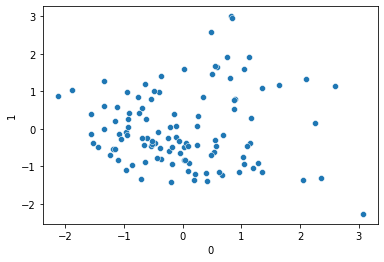

In [286]:
import seaborn as sns
ax = sns.scatterplot(x=X_sc_transformed_df[0], y=X_sc_transformed_df[1],                     
                     palette='RdBu',
                     data=X_sc_transformed_df,
                     legend=False)
plt.show()

Text(0.5, 1.0, 'R2 score- test - MLR: 0.36')

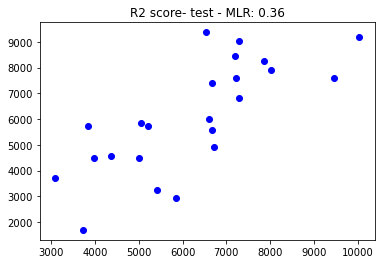

In [287]:
X_train_tr, X_test_tr, y_train_tr, y_test_tr  = train_test_split(X_sc_transformed_df,y, test_size=0.2, random_state=1234)
mlr_transformed = LinearRegression()
mlr.fit(X_train_tr,y_train_tr)

y_pred_test_tr = mlr.predict(X_test_tr)
r2_score_test_mlr_tr = metrics.r2_score(y_test_tr,y_pred_test_tr)

plt.figure()
plt.scatter(y_test_tr,y_pred_test_tr,color="blue")
plt.title('R2 score- test - MLR: %.2f'%(r2_score_test_mlr_tr))

<h3>2.3. Pros and Cons of PCA</h3>

<b>Pros</b>
<ul>
    <li>Effective in finding optimal representation of data with few dimensions</li>
    <li>Decrease redundancy and filter noise in the data</li>
    <li>Visualisation of datasets with high dimensionality</li>
    <li>Improve performance of learning models</li>
</ul>

<b>Cons</b>
<ul>
    <li>May result in some loss of information</li>
    <li>Variables may become less interpretable after transformation</li>
</ul>

<h2>3. Other Dimensionality Reduction methods</h2>

<ul>
  <li>Multi-dimensional Scaling</li>
  <li>t-distributed Stochastic Neighbour Embedding (t-SNE)</li>
</ul>